In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

In [ ]:
# Датасет с сайта https://www.kaggle.com/datasets/sergylog/ab-test-data?resource=download

df = pd.read_csv("AB_Test_Results.csv")
df

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
...,...,...,...
9995,1981,control,0.0
9996,502,variant,0.0
9997,9214,variant,0.0
9998,7741,control,0.0


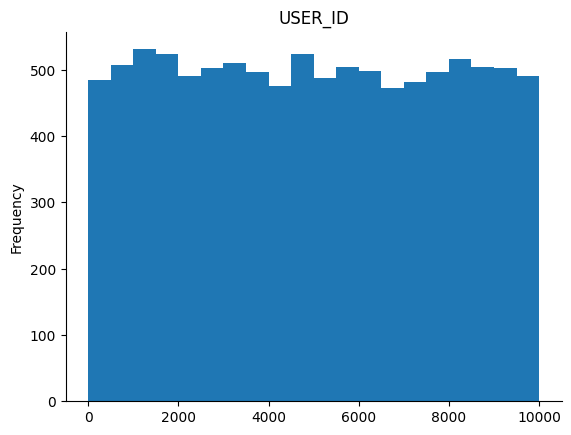

In [ ]:
# USER_ID

df['USER_ID'].plot(kind='hist', bins=20, title='USER_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

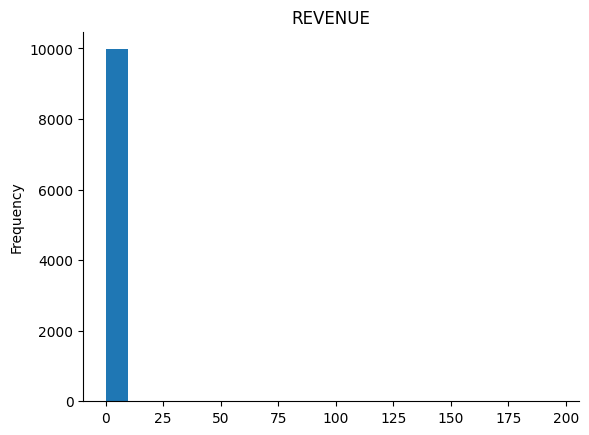

In [ ]:
# REVENUE

df['REVENUE'].plot(kind='hist', bins=20, title='REVENUE')
plt.gca().spines[['top', 'right',]].set_visible(False)

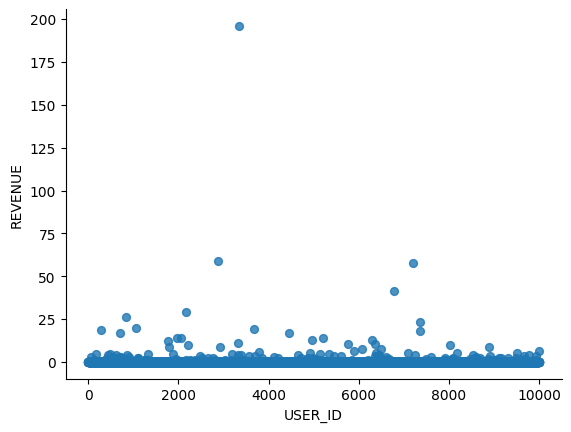

In [ ]:
# USER_ID vs REVENUE

df.plot(kind='scatter', x='USER_ID', y='REVENUE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

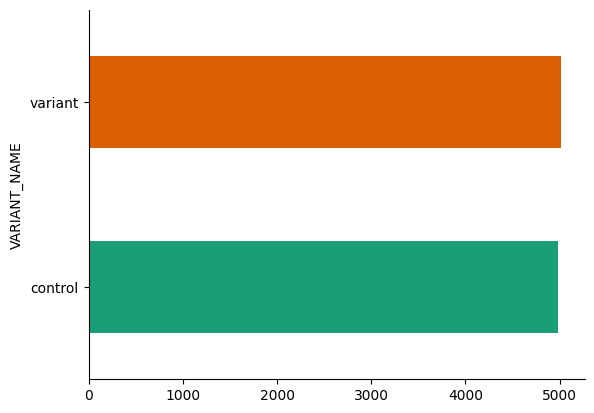

In [ ]:
# VARIANT_NAME

df.groupby('VARIANT_NAME').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-296-943f8fb16f37>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='REVENUE', y='VARIANT_NAME', inner='box', palette='Dark2')


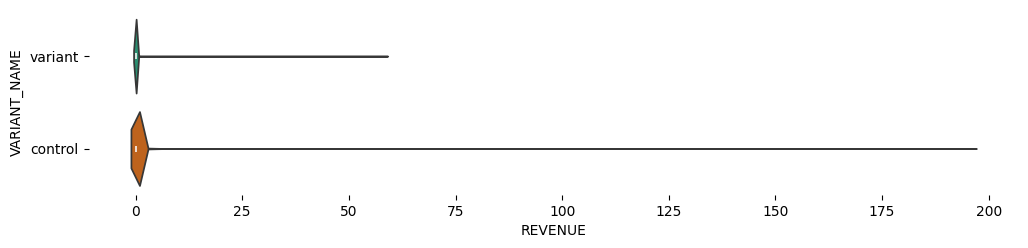

In [ ]:
# VARIANT_NAME vs REVENUE

figsize = (12, 1.2 * len(df['VARIANT_NAME'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='REVENUE', y='VARIANT_NAME', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df.nunique()

USER_ID         6324
VARIANT_NAME       2
REVENUE          101
dtype: int64

Уникальных пользователей из 10000 только 6324.
Проверим, что среди них нет тех, кто попал и в тестовую, и в контрольную выборки

In [ ]:
попали_и_в_тест_и_в_контроль = df.groupby('USER_ID')['VARIANT_NAME'].nunique()
# Для каждого USER_ID вычисляем, сколько уникальных значений из столбца VARIANT_NAME ему соответствует

In [ ]:
попали_и_в_тест_и_в_контроль

USER_ID
2        1
3        2
4        1
5        1
6        1
        ..
9993     1
9995     1
9996     2
9998     1
10000    2
Name: VARIANT_NAME, Length: 6324, dtype: int64

Видим, что имеются пользователи, которые попали и в тест и в контроль.Посмотрим, сколько их в процентном соотношении от всех пользователей.

In [ ]:
попали_и_в_тест_и_в_контроль.value_counts()

VARIANT_NAME
1    4783
2    1541
Name: count, dtype: int64

In [ ]:
1541 / 6324

0.24367488931056294

24% это достаточно много, так что нам придётся убрать этих пользователей из выборки

In [ ]:
norm_users = (df.groupby('USER_ID')['VARIANT_NAME'].nunique() == 1)

In [ ]:
norm_users

USER_ID
2         True
3        False
4         True
5         True
6         True
         ...  
9993      True
9995      True
9996     False
9998      True
10000    False
Name: VARIANT_NAME, Length: 6324, dtype: bool

In [ ]:
norm_users = norm_users[norm_users == True]

In [ ]:
norm_users

USER_ID
2       True
4       True
5       True
6       True
9       True
        ... 
9990    True
9992    True
9993    True
9995    True
9998    True
Name: VARIANT_NAME, Length: 4783, dtype: bool

In [ ]:
df = df[df['USER_ID'].isin(norm_users.index)]

In [ ]:
df

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
4,6174,variant,0.0
5,2380,variant,0.0
7,9168,control,0.0
9,7548,control,0.0
...,...,...,...
9993,2400,variant,0.0
9994,3129,control,0.0
9996,502,variant,0.0
9998,7741,control,0.0


Итак, в наших теперь уже отфильтрованных данных остались только те пользователи,
которые принадлежат только одной группе (тестовой или контрольной)

<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

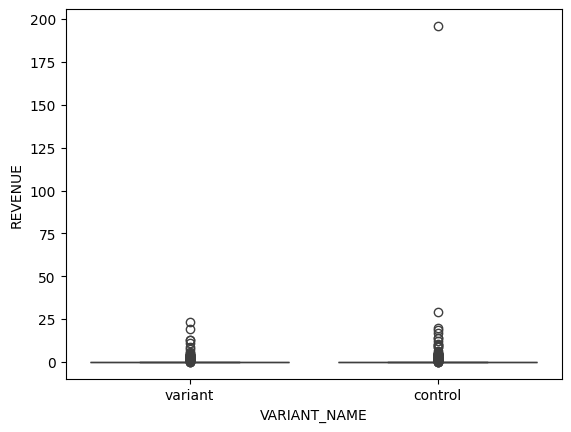

In [ ]:
# boxplot

sns.boxplot(df, x='VARIANT_NAME', y='REVENUE')

Видим, что имеется мощный выброс в выручке

In [ ]:
df.sort_values(by='REVENUE', ascending=False)

,USER_ID,VARIANT_NAME,REVENUE
1437,3342,control,196.01
8168,2166,control,29.32
2482,7356,variant,23.04
6412,1053,control,20.07
5217,3684,variant,19.47
...,...,...,...
3366,1189,control,0.00
3363,2051,variant,0.00
3362,3276,variant,0.00
3360,1608,variant,0.00


In [ ]:
df[df['USER_ID'] == 3342]

,USER_ID,VARIANT_NAME,REVENUE
1437,3342,control,196.01


Он такой один.

In [ ]:
# Уберём этот выброс из данных

df = df[df['USER_ID'] != 3342]
df.sort_values(by='REVENUE', ascending=False)

,USER_ID,VARIANT_NAME,REVENUE
8168,2166,control,29.32
2482,7356,variant,23.04
6412,1053,control,20.07
5217,3684,variant,19.47
5530,282,control,18.56
...,...,...,...
3366,1189,control,0.00
3363,2051,variant,0.00
3362,3276,variant,0.00
3360,1608,variant,0.00


<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

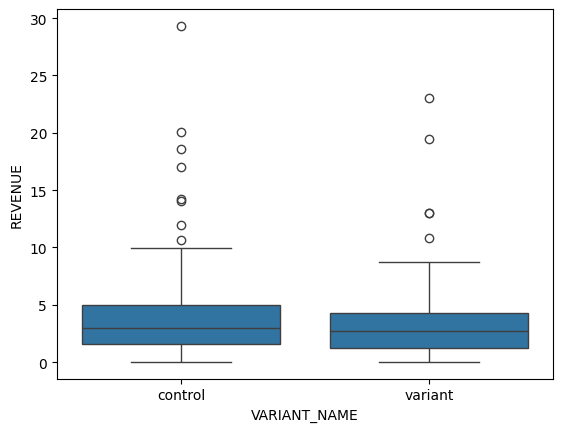

In [ ]:
sns.boxplot(df[df['REVENUE'] != 0], x='VARIANT_NAME', y='REVENUE')

# Уберём нулевое значение выборки, т.к. иначе не виден сам box

Мы видим, что большинство пользователей не делают заказов. С чем это может быть связано? Это могут быть просто записи всех пользователей, независимо от того, делают они заказы или нет, ЛИБО они могут быть сделаны, когда юзер заходит на сайт, но ничего не заказывает

In [ ]:
# Проверим, есть ли пользователи, у которых есть записи с нулевой И с ненулевой выручкой

(df.loc[(df['REVENUE'] == 0) & (df['USER_ID'].isin(df.loc[df['REVENUE'] != 0, 'USER_ID'].values))]).count()

USER_ID         52
VARIANT_NAME    52
REVENUE         52
dtype: int64

Мы хотим оставить только одну запись на одного пользователя. Для этого мы для каждого польщователя запишем сколько он суммарно принёс за время проведения аб теста

In [ ]:
# Группируем данные по каждому пользователю и суммируем выручку

df = df.groupby(by=['USER_ID', 'VARIANT_NAME']).sum().reset_index()

In [ ]:
df

,USER_ID,VARIANT_NAME,REVENUE
0,2,control,0.0
1,4,variant,0.0
2,5,variant,0.0
3,6,variant,0.0
4,9,variant,0.0
...,...,...,...
4777,9990,variant,0.0
4778,9992,control,0.0
4779,9993,control,0.0
4780,9995,variant,0.0


<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

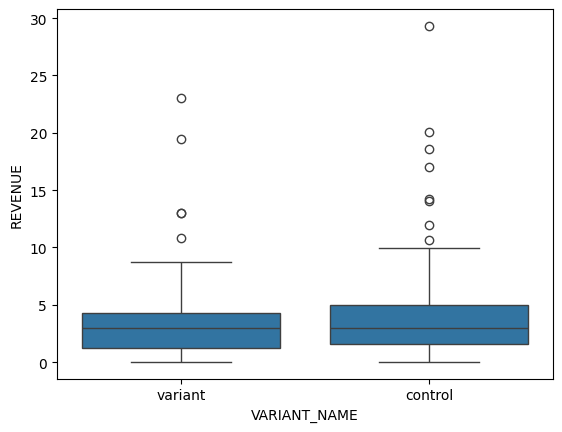

In [ ]:
# Посмотрим какое теперь получилось распределение

sns.boxplot(df[df['REVENUE'] != 0], x='VARIANT_NAME', y='REVENUE')

In [ ]:
df.describe()

,USER_ID,REVENUE
count,4782.000000,4782.000000
mean,4994.741322,0.094912
std,2898.823072,1.021705
min,2.000000,0.000000
25%,2475.500000,0.000000
50%,4976.000000,0.000000
75%,7516.000000,0.000000
max,9998.000000,29.320000


In [ ]:
# Посмотрим метрики

stats = df.groupby(by='VARIANT_NAME').agg({'USER_ID': 'nunique',
                                           'REVENUE': ['sum', 'mean', 'median', 'count']})

orders_per_user = stats.loc[:, ('REVENUE', 'count')] / stats.loc[:, ('USER_ID', 'nunique')]
revenue_per_user = stats.loc[:, ('REVENUE', 'sum')] / stats.loc[:, ('USER_ID', 'nunique')]

stats.loc[:, ('per_user', 'orders')] = orders_per_user
stats.loc[:, ('per_user', 'revenue')] = revenue_per_user

In [ ]:
stats

USER_ID REVENUE                        per_user          
             nunique     sum      mean median count   orders   revenue
VARIANT_NAME                                                          
control         2389  274.55  0.114923    0.0  2389      1.0  0.114923
variant         2393  179.32  0.074935    0.0  2393      1.0  0.074935

## !!! Мы видим, что в тестовой группе общая сумма выручки и средний чек на одного пользователя снизились, но количество заказов на одного пользователя немного увеличилось.

<ipython-input-320-92d3282975bb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['VARIANT_NAME'] == 'control', 'REVENUE'], label='control')
<ipython-input-320-92d3282975bb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['VARIANT_NAME'] == 'variant', 'REVENUE'], label='vari

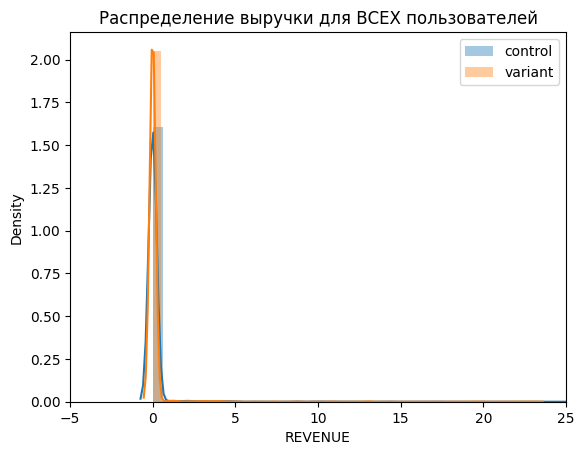

In [ ]:
sns.distplot(df.loc[df['VARIANT_NAME'] == 'control', 'REVENUE'], label='control')
sns.distplot(df.loc[df['VARIANT_NAME'] == 'variant', 'REVENUE'], label='variant')
plt.title('Распределение выручки для ВСЕХ пользователей')
plt.xlim(-5,25)
plt.legend()

<ipython-input-321-ba562b85f7cd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[(df['VARIANT_NAME'] == 'control') & (df['REVENUE'] != 0), 'REVENUE'], label='control')
<ipython-input-321-ba562b85f7cd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[(df['VARIANT_NAME'] == 'variant

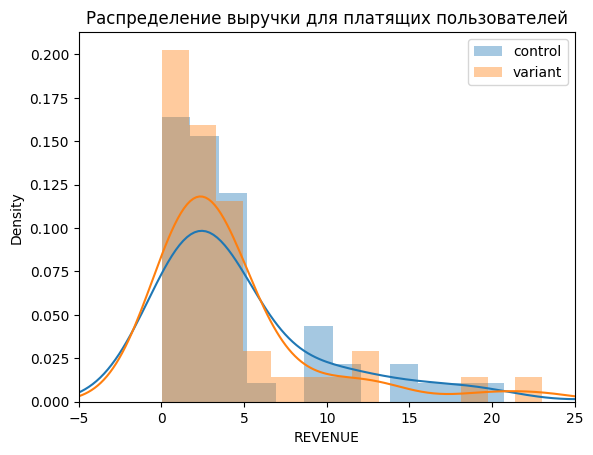

In [ ]:
sns.distplot(df.loc[(df['VARIANT_NAME'] == 'control') & (df['REVENUE'] != 0), 'REVENUE'], label='control')
sns.distplot(df.loc[(df['VARIANT_NAME'] == 'variant') & (df['REVENUE'] != 0), 'REVENUE'], label='variant')
plt.title('Распределение выручки для платящих пользователей')
plt.xlim(-5,25)
plt.legend()

# Проверим, является ли распределение нормальным
Вообще говоря, визуально видно, что распределение не является нормальным, но мы можем это дополнительно проверить критерием Шапиро-Уилка

$ H_0 $ : случайная величина $X$ распределена нормально

$ H_1 $ : случайная величина $X$ распределена как-то по-другому

Если p_value < 0.05, отклоняем гипотезу $H_0$ в пользу альтернативы $H_1$

In [ ]:
sp.stats.shapiro(df.loc[df['VARIANT_NAME'] == 'variant', 'REVENUE'])

ShapiroResult(statistic=0.06145977973937988, pvalue=0.0)

# Будем использовать критерий Манна-Уитни-Уилкоксона (MWW)

Давайте проверим значение статистики теста Манна-Уитни. Некоторые источники имеют ограничения на применимость в случае дублирования данных. В нашей выборке много повторений, и особенно много нулевых значений, поэтому в данном случае нам нужно быть осторожными с этим критерием.

$H_0$ : Статистически значимых различий между выборками нет

$H_1$ : Имеется существенное различие между уровнем признака в рассматриваемых выборках

Если p_value > 0.05, принимаем гипотезу $H_0$

In [ ]:
(df['REVENUE'] == 0).value_counts()

REVENUE
True     4687
False      95
Name: count, dtype: int64

In [ ]:
# Сначала проверим всех пользователей
sp.stats.mannwhitneyu(df.loc[df.VARIANT_NAME == 'variant', 'REVENUE'], df.loc[df.VARIANT_NAME == 'control', 'REVENUE'])

MannwhitneyuResult(statistic=2845109.0, pvalue=0.24799555106821947)

In [ ]:
# А теперь только тех, кто платит
sp.stats.mannwhitneyu(df.loc[(df.VARIANT_NAME == 'variant') & (df.REVENUE != 0), 'REVENUE'],
                      df.loc[(df.VARIANT_NAME == 'control') & (df.REVENUE != 0), 'REVENUE'])

MannwhitneyuResult(statistic=1029.0, pvalue=0.5314192217084708)

Слабый, но универсальный Манн-Уитни показал, что статистически значимых различий между выборками нет

# Bootstrap

Берём подвыборки с возвращением, смотрим разницу в метриках, строим её распределение, строим 95% доверительный интервал. Если он попадает на 0, то разница не значима - выбираем $H_0$

In [ ]:
# Создадим функцию для получения подвыборок с возвращением
def get_bootstrap_samples(data, sample_size=1000):
    indicies = np.random.randint(0, len(data), (sample_size, len(data)))
    return data[indicies]

In [ ]:
# Сгенерируем подвыборки с возвращением сначала для ВСЕХ пользователей

control = get_bootstrap_samples(df.loc[df.VARIANT_NAME == 'control', 'REVENUE'].values, 10000)
variant = get_bootstrap_samples(df.loc[df.VARIANT_NAME == 'variant', 'REVENUE'].values, 10000)

<ipython-input-328-07bc2b6f1070>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.mean(control, axis=1), shade=True, label='control')
<ipython-input-328-07bc2b6f1070>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.mean(variant, axis=1), shade=True, label='variant')


Text(0.5, 1.0, 'Выборочное среднее распределение для ВСЕХ пользователей')

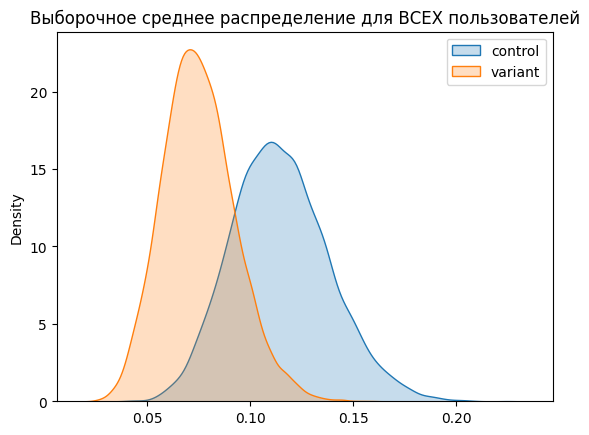

In [ ]:
sns.kdeplot(np.mean(control, axis=1), shade=True, label='control')
sns.kdeplot(np.mean(variant, axis=1), shade=True, label='variant')
plt.legend()
plt.title('Выборочное среднее распределение для ВСЕХ пользователей')

In [ ]:
# А теперь только для платящих

control_paid = get_bootstrap_samples(df.loc[(df.VARIANT_NAME == 'control') & (df.REVENUE != 0), 'REVENUE'].values, 10000)
variant_paid = get_bootstrap_samples(df.loc[(df.VARIANT_NAME == 'variant') & (df.REVENUE != 0), 'REVENUE'].values, 10000)

<ipython-input-330-d9588f02616c>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.mean(control_paid, axis=1), shade=True, label='control_paid')
<ipython-input-330-d9588f02616c>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.mean(variant_paid, axis=1), shade=True, label='variant_paid')


Text(0.5, 1.0, 'Выборочное среднее распределение для платящих пользователей')

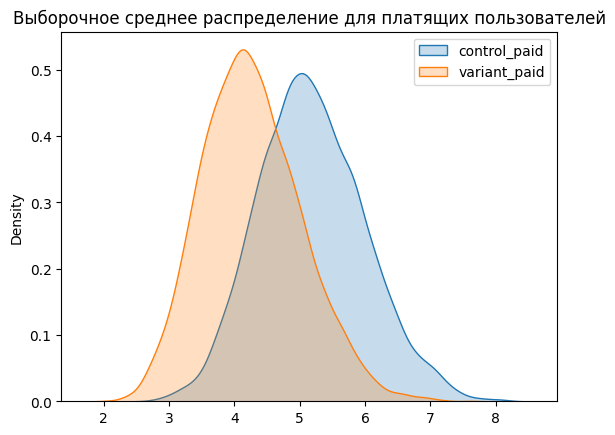

In [ ]:
sns.kdeplot(np.mean(control_paid, axis=1), shade=True, label='control_paid')
sns.kdeplot(np.mean(variant_paid, axis=1), shade=True, label='variant_paid')
plt.legend()
plt.title('Выборочное среднее распределение для платящих пользователей')

Мы видим, что различия есть, но доверительные интервалы могут перекрываться, поэтому нам нужно посмотреть на распределение разницы в средних значениях между группами, чтобы сделать окончательные выводы.

Оценим разницу между группами: посмотрим на распределение средней разницы и построим для нее доверительные интервалы. Для этого мы создадим функцию для визуализации

In [ ]:
# Функция для получения доверительного интервала
def get_stat_interval(stat, alpha=0.05):
    return np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])

# Функция для визуализации
def plot_distribution_and_stat_intervals(variant, control, title, alpha=0.05):
    """ Plot the distribution of the mean difference and return the confidence intervals """
    f, ax = plt.subplots()
    # получаем данные для закрашивания доверительных интервалов
    points = sns.kdeplot(variant - control, shade=False).get_lines()[0].get_data()
    x = points[0]
    y = points[1]
    ymin, ymax = plt.ylim()
    # отметим нулевое значение и границы доверительного интервала
    plt.vlines(0, 0, ymax, label='0', color='gray')
    plt.vlines(get_stat_interval(variant - control, alpha)[0], 0, ymax, linestyles="dashed")
    plt.vlines(get_stat_interval(variant - control, alpha)[1], 0, ymax, linestyles="dashed")
    # закрасим доверительный интервал и зоны вокруг него
    plt.fill_between(x,y,
                     where = (x >= get_stat_interval(variant - control, alpha)[1]),
                     color='gainsboro')
    plt.fill_between(x,y,
                     where = (x <= get_stat_interval(variant - control, alpha)[0]),
                     color='gainsboro')
    plt.fill_between(x,y,
                     where = ((x >= get_stat_interval(variant - control, alpha)[0])
                              & (x <= get_stat_interval(variant - control, alpha)[1])),
                     color='red',
                     label = '95% confidence interval')
    plt.title(f'Распределение разницы между средними значениями (variant - control) {title}')
    plt.legend(prop={'size':13})
    # возвращаем доверительный интервал
    return get_stat_interval(variant - control)

<ipython-input-334-22ba9cf228be>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  points = sns.kdeplot(variant - control, shade=False).get_lines()[0].get_data()


array([-0.09897864,  0.01538969])

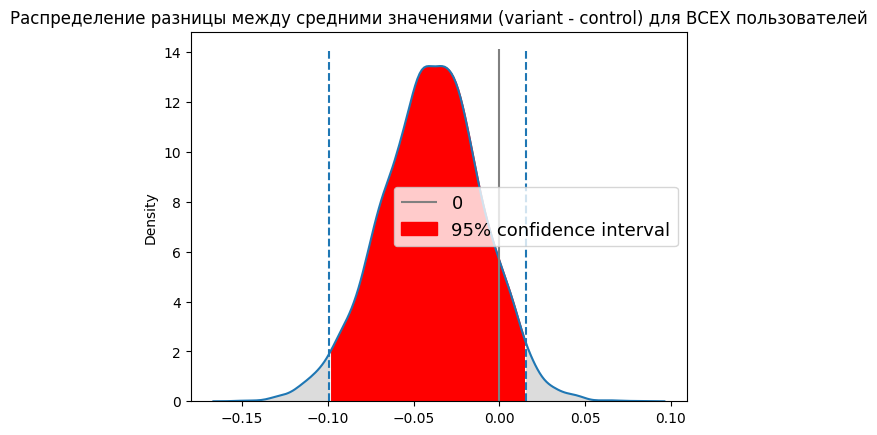

In [ ]:
plot_distribution_and_stat_intervals(
    np.mean(variant, axis=1),
    np.mean(control, axis=1),
    title='для ВСЕХ пользователей'
)

<ipython-input-334-22ba9cf228be>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  points = sns.kdeplot(variant - control, shade=False).get_lines()[0].get_data()


array([-3.12987882,  1.2830237 ])

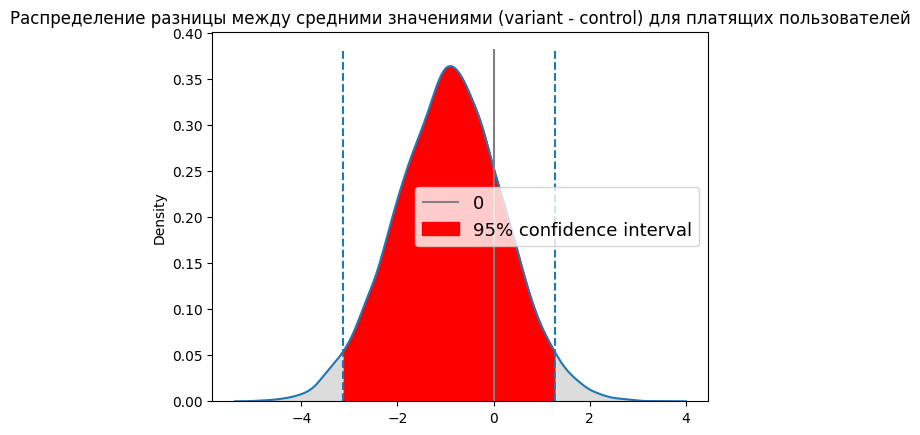

In [ ]:
plot_distribution_and_stat_intervals(
    np.mean(variant_paid, axis=1),
    np.mean(control_paid, axis=1),
    title='для платящих пользователей'
)

Мы видим, что нулевое значение находится в пределах доверительного интервала, поэтому мы не можем сказать ничего о стат. значимом изменении средней выручки между тестируемыми группами ab

# Выводы

Несмотря на то, что выручка в тестовой группе значительно снизилась, статистически значимых изменений между тестовыми группами ab не наблюдалось, как среди всех пользователей, так и только среди платящей аудитории. Для более глубокого анализа будут полезны данные A/A-теста и дальнейшего изучения эффективности критериев.